In [42]:
import pandas as pd
import matplotlib.pyplot as plt

players = pd.read_csv('./data/Players.csv')
ranked_matches = pd.read_csv('./data/RankedMatches.csv')
ranked_player_match_data = pd.read_csv('./data/RankedPlayerMatchData.csv')
swiftplay_matches = pd.read_csv('./data/SwiftplayMatches.csv')
swiftplay_player_match_data = pd.read_csv('./data/SwiftplayPlayerMatchData.csv')

In [43]:
print(players.columns)
print(ranked_matches.columns)
print(ranked_player_match_data.columns)
print(swiftplay_matches.columns)
print(swiftplay_player_match_data.columns)

Index(['puuid', 'summonerLevel', 'tier', 'rank', 'swiftplay_kills',
       'swiftplay_deaths', 'swiftplay_assists', 'swiftplay_kd', 'swiftplay_ad',
       'swiftplay_kda', 'swiftplay_kad', 'swiftplay_win_loss_ratio',
       'ranked_kills', 'ranked_deaths', 'ranked_assists', 'ranked_kd',
       'ranked_ad', 'ranked_kda', 'ranked_kad', 'ranked_win_loss_ratio'],
      dtype='object')
Index(['matchId', 'gameDuration', 'endOfGameResult', 'gameEndedInSurrender',
       'gameEndedInEarlySurrender'],
      dtype='object')
Index(['matchId', 'puuid', 'teamId', 'summonerLevel', 'role', 'teamPosition',
       'kills', 'deaths', 'assists', 'championId', 'win',
       'teamEarlySurrendered', 'totalTimeSpentDead', 'timePlayed',
       'longestTimeSpentLiving', 'tier', 'rank', 'championLevel',
       'championPoints'],
      dtype='object')
Index(['matchId', 'gameDuration', 'endOfGameResult', 'gameEndedInSurrender',
       'gameEndedInEarlySurrender'],
      dtype='object')
Index(['matchId', 'puuid', 

In [44]:
swiftplay_player_match_data["full_rank"] = swiftplay_player_match_data["tier"] + " " + swiftplay_player_match_data["rank"]
swiftplay_player_match_data["full_rank"] = swiftplay_player_match_data["full_rank"].replace("UNRANKED UNRANKED", "UNRANKED")

ranked_player_match_data["full_rank"] = ranked_player_match_data["tier"] + " " + ranked_player_match_data["rank"]
ranked_player_match_data["full_rank"] = ranked_player_match_data["full_rank"].replace("UNRANKED UNRANKED", "UNRANKED")

players["full_rank"] = players["tier"] + " " + players["rank"]
players["full_rank"] = players["full_rank"].replace("UNRANKED UNRANKED", "UNRANKED")

In [45]:
# Convert to a categorical variable
# Define the custom order
rank_order = ['UNRANKED', 
                   'IRON I', 'IRON II', 'IRON III', 'IRON IV',
                   'BRONZE I', 'BRONZE II', 'BRONZE III', 'BRONZE IV',
                   'SILVER I', 'SILVER II', 'SILVER III', 'SILVER IV',
                   'GOLD I', 'GOLD II', 'GOLD III', 'GOLD IV',
                   'PLATINUM I', 'PLATINUM II', 'PLATINUM III', 'PLATINUM IV',
                   'EMERALD I', 'EMERALD II', 'EMERALD III', 'EMERALD IV',
                   'DIAMOND I', 'DIAMOND II', 'DIAMOND III', 'DIAMOND IV',
                   'MASTER I', 'GRANDMASTER I', 'CHALLENGER I']

# Create a CategoricalDtype with the specified order
rank_type = pd.api.types.CategoricalDtype(categories=rank_order, ordered=True)

# Apply the CategoricalDtype to the column
swiftplay_player_match_data["full_rank"] = swiftplay_player_match_data["full_rank"].astype(rank_type)
ranked_player_match_data["full_rank"] = ranked_player_match_data["full_rank"].astype(rank_type)
players["full_rank"] = players["full_rank"].astype(rank_type)

# Summoner Level: Ranked vs. Swiftplay

<Axes: xlabel='full_rank'>

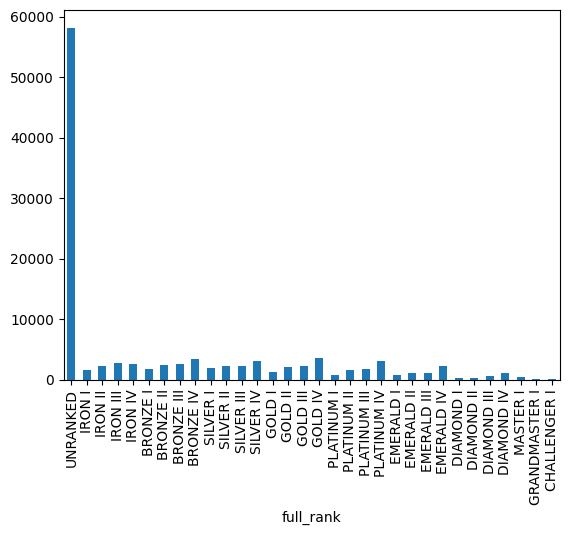

In [46]:
swiftplay_player_match_data["full_rank"].value_counts().reindex(rank_order).plot(kind='bar')

<Axes: xlabel='full_rank'>

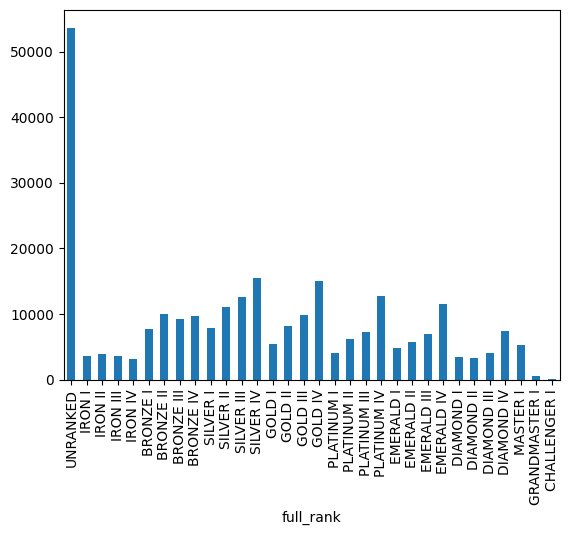

In [47]:
ranked_player_match_data["full_rank"].value_counts().reindex(rank_order).plot(kind='bar')